# ΑΝΑΦΟΡΑ ΣΤΗΝ 1Η ΕΡΓΑΣΤΗΡΙΑΚΗ ΑΣΚΗΣΗ ΣΤΗ ΣΤΑΤΙΣΤΙΚΗ ΕΠΕΞΕΡΓΑΣΙΑ ΣΗΜΑΤΟΣ ΚΑΙ ΜΑΘΗΣΗ

# ΑΓΓΕΛΟΣ ΝΙΚΟΛΑΟΣ ΠΟΤΑΜΙΑΝΟΣ ΑΜ:1084537 EMAIL: up1084537@ac.upatras.gr

# 1.2

In [8]:
import numpy as np

# Θέτουμε το πλήθος των δειγμάτων και το μήκος του εκτιμώμενου FIR
N = 1000
L = 3

# Δημιουργούμε λευκό Gaussian θόρυβο για x(n) με μέση τιμή 0 και διασπορά 1
np.random.seed(0)
x = np.random.normal(0, 1, N)

# Δημιουργούμε την έξοδο d(n) από το πραγματικό FIR:
# d(n) = x(n) - 0.4*x(n-1) - 4*x(n-2) + 0.5*x(n-3)
# με σωστή αντιμετώπιση των αρχικών δειγμάτων (zero-padding)
d = np.zeros(N)
for n in range(N):
    d[n] = x[n]
    if n >= 1:
        d[n] -= 0.4 * x[n - 1]
    if n >= 2:
        d[n] -= 4.0 * x[n - 2]
    if n >= 3:
        d[n] += 0.5 * x[n - 3]

# Δημιουργούμε τον πίνακα X μεγέθους N x (L+1),
# ούτως ώστε η γραμμή n να αντιστοιχεί στο [x(n), x(n-1), x(n-2), x(n-3)]
X = np.zeros((N, L+1))
for n in range(N):
    X[n, 0] = x[n]
    if n >= 1:
        X[n, 1] = x[n-1]
    if n >= 2:
        X[n, 2] = x[n-2]
    if n >= 3:
        X[n, 3] = x[n-3]

# Εφαρμόζουμε τον τύπο Wiener–Hopf με Least Squares:
# w0 = (X^T X)^(-1) X^T d
w0 = np.linalg.inv(X.T @ X) @ (X.T @ d)

# Εμφάνιση των τελικών εκτιμώμενων συντελεστών
print("Τελικοί εκτιμώμενοι συντελεστές Wiener:")
for i, coef in enumerate(w0):
    print(f"w0[{i}] = {coef:.6f}")

# Προαιρετικά, σύγκριση με τους πραγματικούς συντελεστές του H(z)
real_coeffs = np.array([1.0, -0.4, -4.0, 0.5])
print("\nΠραγματικοί συντελεστές:")
for i, rc in enumerate(real_coeffs):
    print(f"h[{i}] = {rc}")


Τελικοί εκτιμώμενοι συντελεστές Wiener:
w0[0] = 1.000000
w0[1] = -0.400000
w0[2] = -4.000000
w0[3] = 0.500000

Πραγματικοί συντελεστές:
h[0] = 1.0
h[1] = -0.4
h[2] = -4.0
h[3] = 0.5


# 1.3.2

In [9]:
import numpy as np

# 1. Παράμετροι
N = 1000          # Πλήθος δειγμάτων
L = 3             # Τάξη φίλτρου (άρα 4 συντελεστές: w0, w1, w2, w3)
np.random.seed(0) # Για αναπαραγωγιμότητα (προαιρετικά)

# 2. Δημιουργία εισόδου x(n): λευκός Gaussian θόρυβος (mean=0, var=1)
x = np.random.normal(0, 1, N)

# 3. Δημιουργία εξόδου d(n) από το πραγματικό σύστημα H(z)
#    d(n) = x(n) - 0.4*x(n-1) - 4*x(n-2) + 0.5*x(n-3)
d = np.zeros(N)
for n in range(N):
    d[n] = x[n]
    if n >= 1:
        d[n] -= 0.4 * x[n-1]
    if n >= 2:
        d[n] -= 4.0 * x[n-2]
    if n >= 3:
        d[n] += 0.5 * x[n-3]

# 4. Ορισμός του LMS
#    Μέγεθος βήματος mu (με βάση μ_max = 2, αφού λευκό x(n) με διασπορά 1 -> λmax=1)
mu_max = 2.0
mu = 0.1 * mu_max  # => mu = 0.2

# 5. Αρχικοποίηση των βαρών w(n) = [w0, w1, w2, w3]^T στο μηδέν
w = np.zeros(L+1)

# 6. Βρόχος LMS
for n in range(N):
    # Δημιουργούμε το διάνυσμα εισόδου x_vec(n) = [x(n), x(n-1), x(n-2), x(n-3)]
    x_vec = np.zeros(L+1)
    x_vec[0] = x[n]
    if n >= 1: x_vec[1] = x[n-1]
    if n >= 2: x_vec[2] = x[n-2]
    if n >= 3: x_vec[3] = x[n-3]

    # Υπολογισμός εξόδου y(n) του φίλτρου w(n)
    y = np.dot(w, x_vec)

    # Υπολογισμός σφάλματος e(n) = d(n) - y(n)
    e = d[n] - y

    # Ενημέρωση του διάνυσματος βαρών
    w = w + mu * e * x_vec

# 7. Εκτυπώνουμε τους τελικούς προσαρμοσμένους συντελεστές LMS
print("Τελικοί συντελεστές μέσω LMS:")
for i, coef in enumerate(w):
    print(f"w[{i}] = {coef:.6f}")

# 8. Σύγκριση με το βέλτιστο φίλτρο από το Ερώτημα 1.2 (Wiener):
#    Εδώ υποθέτουμε ότι το w_opt προκύπτει από την προηγούμενη εκτίμηση Least Squares
#    ή ότι έχει ήδη υπολογιστεί / δοθεί. Για παράδειγμα:
# (Προαιρετικό) Υπολογισμός w_opt (Wiener) με μέθοδο Least Squares για αναφορά
X = np.zeros((N, L+1))
for n in range(N):
    X[n, 0] = x[n]
    if n >= 1: X[n, 1] = x[n-1]
    if n >= 2: X[n, 2] = x[n-2]
    if n >= 3: X[n, 3] = x[n-3]
w_opt = np.linalg.inv(X.T @ X) @ (X.T @ d)

print("\nΣυντελεστές φίλτρου Wiener (από Ερώτημα 1.2):")
for i, coef in enumerate(w_opt):
    print(f"w_opt[{i}] = {coef:.6f}")

# 9. Προαιρετική εκτύπωση των πραγματικών συντελεστών του H(z)
real_coeffs = np.array([1.0, -0.4, -4.0, 0.5])
print("\nΠραγματικοί συντελεστές H(z):")
for i, rc in enumerate(real_coeffs):
    print(f"h[{i}] = {rc}")


Τελικοί συντελεστές μέσω LMS:
w[0] = 1.000000
w[1] = -0.400000
w[2] = -4.000000
w[3] = 0.500000

Συντελεστές φίλτρου Wiener (από Ερώτημα 1.2):
w_opt[0] = 1.000000
w_opt[1] = -0.400000
w_opt[2] = -4.000000
w_opt[3] = 0.500000

Πραγματικοί συντελεστές H(z):
h[0] = 1.0
h[1] = -0.4
h[2] = -4.0
h[3] = 0.5


# 1.3.3


=== Αποτελέσματα για μ = 0.0020 ===
Τελικοί συντελεστές:
w[0] = 0.846704
w[1] = -0.320833
w[2] = -3.431663
w[3] = 0.467990

=== Αποτελέσματα για μ = 0.0200 ===
Τελικοί συντελεστές:
w[0] = 1.000000
w[1] = -0.400000
w[2] = -4.000000
w[3] = 0.500000

=== Αποτελέσματα για μ = 0.2000 ===
Τελικοί συντελεστές:
w[0] = 1.000000
w[1] = -0.400000
w[2] = -4.000000
w[3] = 0.500000

=== Αποτελέσματα για μ = 1.0000 ===
Τελικοί συντελεστές:
w[0] = 118447737249109600390341961330821419056945602066516279865267808967744727410349088368495185946828700164474109359080834193513815664987549213623582720.000000
w[1] = 114955273802132919137326366832879121636319904931609024866379942560783108013734033247767248349814867811903890985897992248388117768868600031087689728.000000
w[2] = -6233485586453136712152173635093622395875755496980925444275247850787831699891844282202643006870575551570900192704279627627084555773722611995901952.000000
w[3] = -32851857580174774494970562293798798702137833011792466203210395759600454841173

/Users/nickpotamianos/Library/Python/3.9/lib/python/site-packages/matplotlib/scale.py:255: RuntimeWarning: overflow encountered in power
  return np.power(self.base, values)


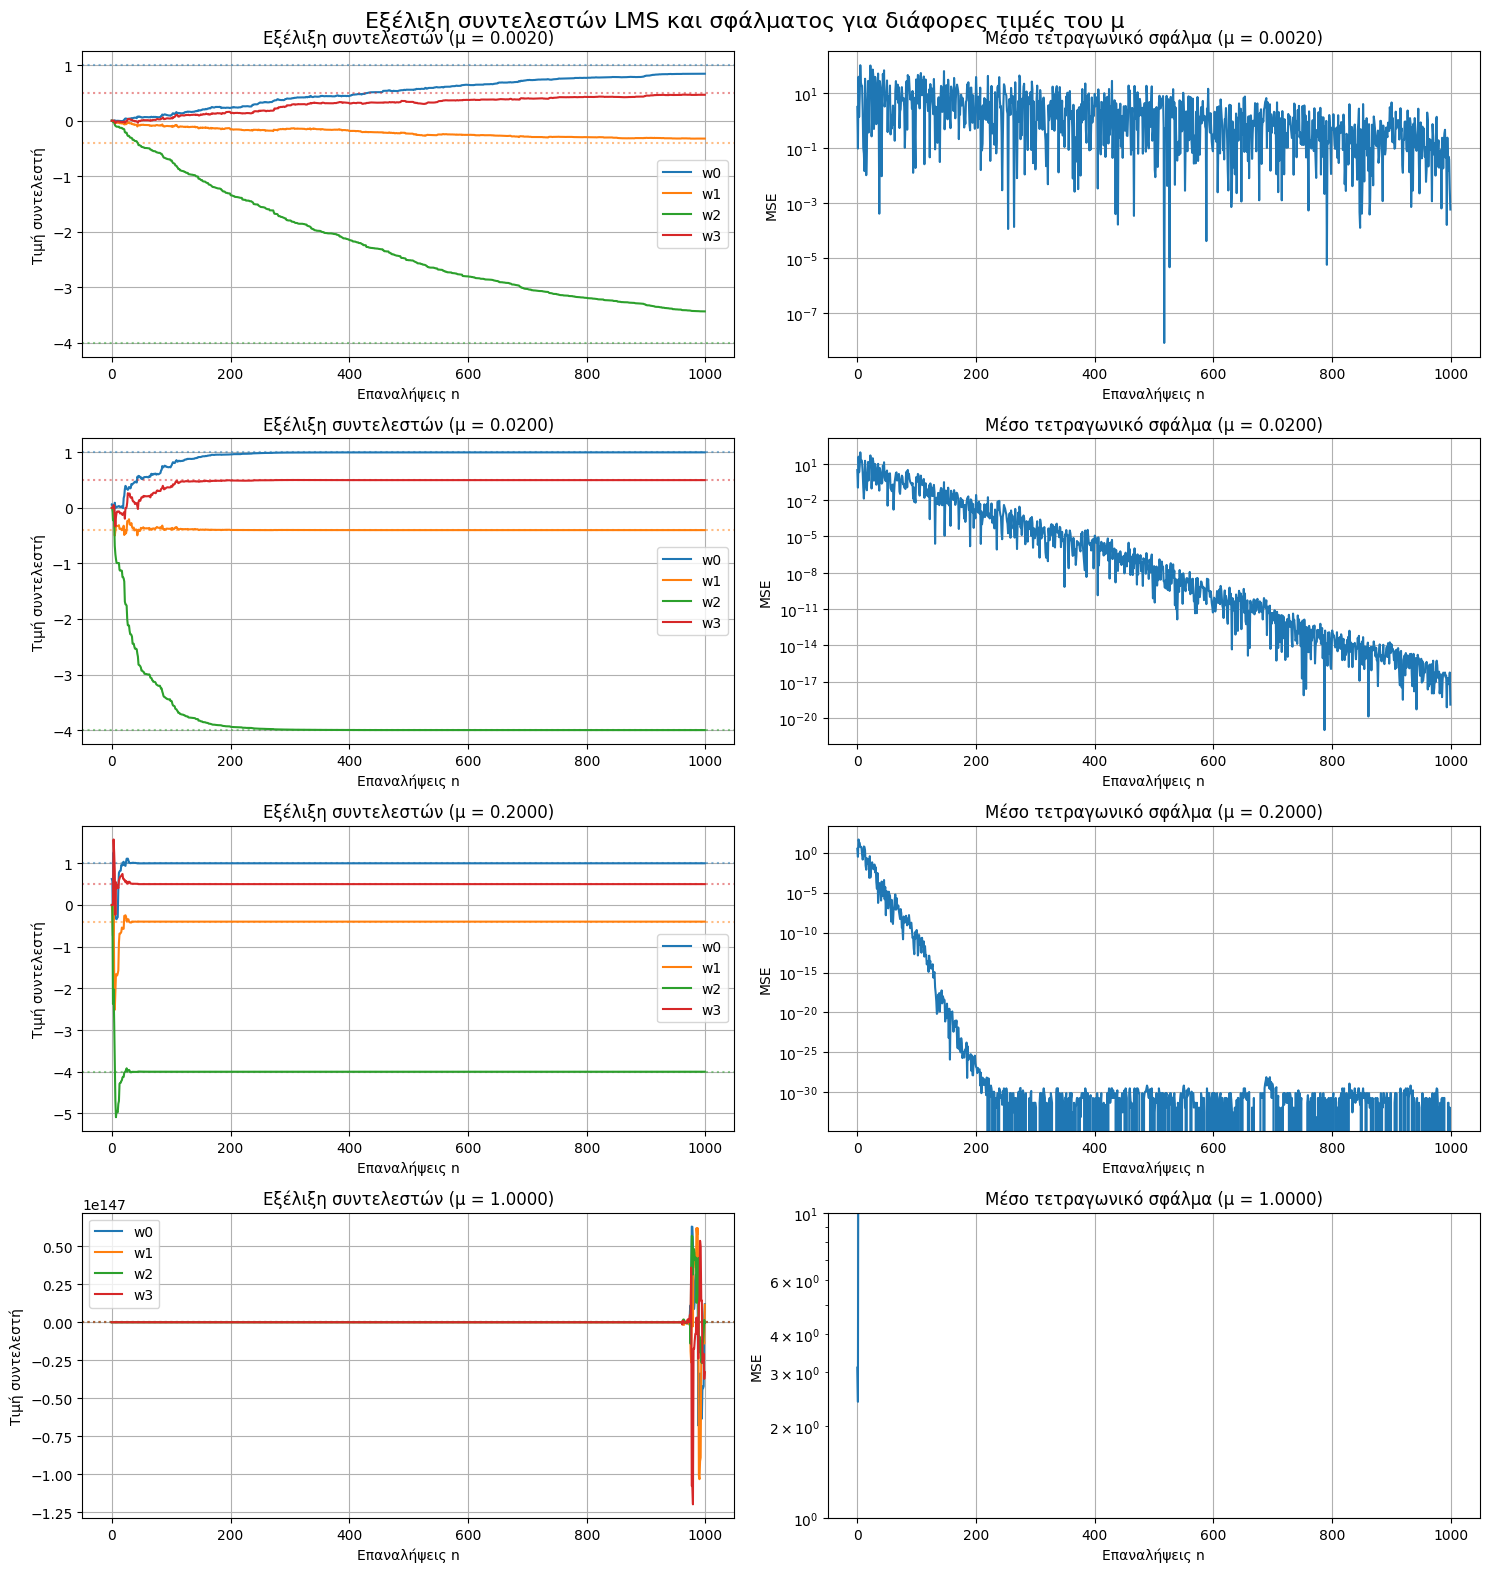


Πραγματικοί συντελεστές H(z) = [1, -0.4, -4.0, 0.5]


In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Παράμετροι
N = 1000  # Πλήθος δειγμάτων
L = 3  # Τάξη φίλτρου (4 συντελεστές)
np.random.seed(0)  # Για αναπαραγωγιμότητα

# 2. Δημιουργία εισόδου x(n) και επιθυμητού d(n)
x = np.random.normal(0, 1, N)
d = np.zeros(N)
for n in range(N):
    d[n] = x[n]
    if n >= 1: d[n] -= 0.4 * x[n - 1]
    if n >= 2: d[n] -= 4.0 * x[n - 2]
    if n >= 3: d[n] += 0.5 * x[n - 3]

# 3. Ορισμός των διαφορετικών τιμών βήματος
mu_max = 2.0  # (για λευκό x(n) με διασπορά 1, λmax = 1)
mu_values = [0.001 * mu_max, 0.01 * mu_max, 0.1 * mu_max, 0.5 * mu_max]


# 4. Συνάρτηση υλοποίησης LMS
def lms_filter(x, d, mu, N, L):
    w_evolution = np.zeros((N, L + 1))
    w_current = np.zeros(L + 1)
    error = np.zeros(N)  # Προσθήκη για αποθήκευση σφάλματος

    for n in range(N):
        x_vec = np.zeros(L + 1)
        x_vec[0] = x[n]
        if n >= 1: x_vec[1] = x[n - 1]
        if n >= 2: x_vec[2] = x[n - 2]
        if n >= 3: x_vec[3] = x[n - 3]

        y = np.dot(w_current, x_vec)
        e = d[n] - y
        error[n] = e  # Αποθήκευση σφάλματος
        w_current = w_current + mu * e * x_vec
        w_evolution[n, :] = w_current

    return w_evolution, error


# 5. Δημιουργία subplots για κάθε τιμή του μ
# Use a built-in style
plt.style.use('default')
fig, axes = plt.subplots(len(mu_values), 2, figsize=(15, 4 * len(mu_values)))
fig.suptitle('Εξέλιξη συντελεστών LMS και σφάλματος για διάφορες τιμές του μ', fontsize=16)

# Πραγματικοί συντελεστές για σύγκριση
true_coeffs = np.array([1, -0.4, -4.0, 0.5])

# 6. Κύριος βρόχος για τις διάφορες τιμές βήματος
for idx, mu in enumerate(mu_values):
    # Εκτέλεση LMS
    w_evol, error = lms_filter(x, d, mu, N, L)

    # Plot εξέλιξης συντελεστών
    ax_coef = axes[idx, 0]
    for i in range(L + 1):
        ax_coef.plot(w_evol[:, i], label=f'w{i}')
        ax_coef.axhline(y=true_coeffs[i], color=f'C{i}', linestyle=':', alpha=0.5)

    ax_coef.set_title(f'Εξέλιξη συντελεστών (μ = {mu:.4f})')
    ax_coef.set_xlabel('Επαναλήψεις n')
    ax_coef.set_ylabel('Τιμή συντελεστή')
    ax_coef.grid(True)
    ax_coef.legend()

    # Plot σφάλματος
    ax_error = axes[idx, 1]
    ax_error.plot(error ** 2, label='MSE')
    ax_error.set_title(f'Μέσο τετραγωνικό σφάλμα (μ = {mu:.4f})')
    ax_error.set_xlabel('Επαναλήψεις n')
    ax_error.set_ylabel('MSE')
    ax_error.grid(True)
    ax_error.set_yscale('log')  # Λογαριθμική κλίμακα για καλύτερη απεικόνιση

    # Εκτύπωση τελικών συντελεστών
    print(f"\n=== Αποτελέσματα για μ = {mu:.4f} ===")
    final_w = w_evol[-1, :]
    print("Τελικοί συντελεστές:")
    for i, coef in enumerate(final_w):
        print(f"w[{i}] = {coef:.6f}")

plt.tight_layout()
plt.show()

# 7. Εκτύπωση πραγματικών συντελεστών
print("\nΠραγματικοί συντελεστές H(z) = [1, -0.4, -4.0, 0.5]")

# 1.3.3.1

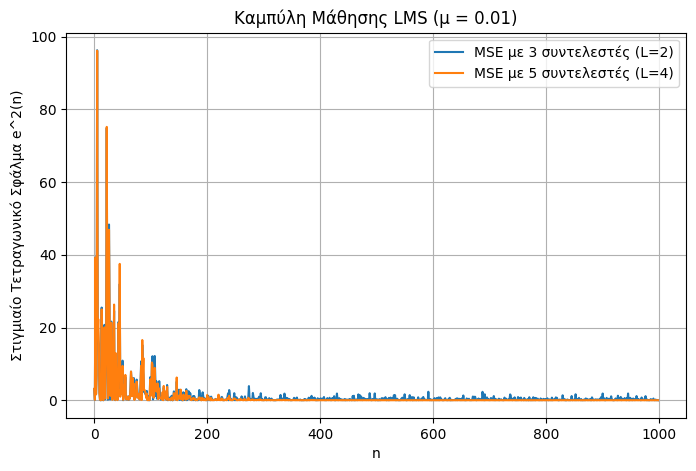

Τελικό MSE (Μέσος όρος τελευταίων 100 δειγμάτων) για 3 συντελεστές: 0.246942
Τελικό MSE (Μέσος όρος τελευταίων 100 δειγμάτων) για 5 συντελεστές: 0.000000


In [11]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Παράμετροι προσομοίωσης
N = 1000          # Πλήθος δειγμάτων
mu = 0.01         # Σταθερό βήμα εκμάθησης
np.random.seed(0) # Για αναπαραγωγιμότητα (προαιρετικά)

# 2. Δημιουργία σήματος εισόδου x(n) και εξόδου d(n)
x = np.random.normal(0, 1, N)
d = np.zeros(N)
for n in range(N):
    d[n] = x[n]
    if n >= 1: d[n] -= 0.4 * x[n-1]
    if n >= 2: d[n] -= 4.0 * x[n-2]
    if n >= 3: d[n] += 0.5 * x[n-3]

# 3. Συνάρτηση LMS που επιστρέφει την ακολουθία του σφάλματος e(n)
def lms_learning_curve(x, d, mu, L):
    """
    Εκτελεί τον αλγόριθμο LMS με FIR τάξης L, σε σήματα x και d,
    και επιστρέφει τον πίνακα e(n) (σφάλμα) για n=0,...,N-1.
    """
    N = len(x)
    w = np.zeros(L+1)    # αρχικοποίηση βαρών
    e_vec = np.zeros(N)  # αποθήκευση του σφάλματος σε κάθε βήμα

    for n in range(N):
        # x_vec: [ x(n), x(n-1), ..., x(n-L) ]
        x_vec = np.zeros(L+1)
        for k in range(L+1):
            if n-k >= 0:
                x_vec[k] = x[n-k]
            else:
                x_vec[k] = 0.0

        y = np.dot(w, x_vec)        # έξοδος εκτιμώμενου φίλτρου
        e = d[n] - y                # σφάλμα e(n)
        e_vec[n] = e

        # ενημέρωση βαρών LMS
        w = w + mu * e * x_vec

    return e_vec

# 4. Εκτέλεση LMS για 3 συντελεστές (L=2) και 5 συντελεστές (L=4)
e_3 = lms_learning_curve(x, d, mu, L=2)   # 3 συντελεστές
e_5 = lms_learning_curve(x, d, mu, L=4)   # 5 συντελεστές

# 5. Καμπύλη μάθησης: μέσο τετραγωνικό σφάλμα σε συνάρτηση του n
mse_3 = e_3**2        # αν θέλουμε στιγμιαία αποτίμηση, ή μπορούμε να πάρουμε έναν κινούμενο μέσο
mse_5 = e_5**2

# (Προαιρετικά) μπορεί να θέλουμε λειασμένο MSE, π.χ. με ολίγον moving average
# ωστόσο εδώ το κρατάμε ως έχει για απλοποίηση.

# 6. Γράφημα MSE έναντι του n
plt.figure(figsize=(8,5))
plt.plot(mse_3, label='ΜSE με 3 συντελεστές (L=2)')
plt.plot(mse_5, label='ΜSE με 5 συντελεστές (L=4)')
plt.title('Καμπύλη Μάθησης LMS (μ = 0.01)')
plt.xlabel('n')
plt.ylabel('Στιγμιαίο Τετραγωνικό Σφάλμα e^2(n)')
plt.legend()
plt.grid(True)
plt.show()

# Προαιρετικά, εκτύπωση των τελικών μέσων τιμών MSE
print(f"Τελικό MSE (Μέσος όρος τελευταίων 100 δειγμάτων) για 3 συντελεστές: {np.mean(mse_3[-100:]):.6f}")
print(f"Τελικό MSE (Μέσος όρος τελευταίων 100 δειγμάτων) για 5 συντελεστές: {np.mean(mse_5[-100:]):.6f}")


# 2.3

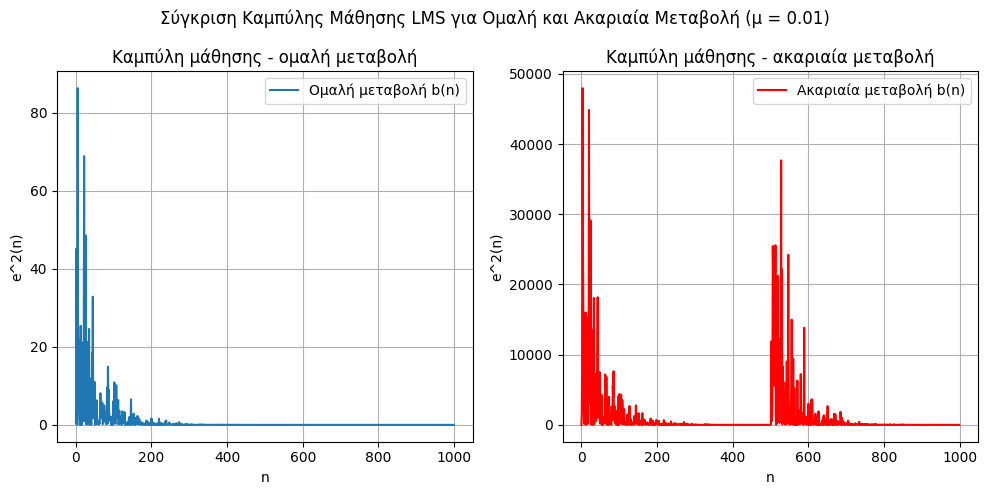

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Βασικές Παράμετροι
N = 1000  # Πλήθος δειγμάτων
L = 3  # Τάξη φίλτρου => 4 συντελεστές (w0, w1, w2, w3)
mu = 0.01  # Μέγεθος βήματος (κατάλληλη τιμή για ομαλή σύγκλιση)
np.random.seed(0)  # Για αναπαραγωγιμότητα (προαιρετικό)

# 2. Δημιουργία εισόδου x(n): λευκός Gaussian θόρυβος (mean=0, var=1)
x = np.random.normal(0, 1, N)


# -------------------------------------------------------------------
# ΣΥΝΑΡΤΗΣΗ LMS ΠΟΥ ΠΡΟΣΑΡΜΟΖΕΤΑΙ ΣΕ ΧΡΟΝΙΚΑ ΜΕΤΑΒΑΛΛΟΜΕΝΟ ΣΥΣΤΗΜΑ
# -------------------------------------------------------------------
def lms_time_varying(x, b_of_n, mu, N, L):
    """
    Εκτελεί τον αλγόριθμο LMS για την ταυτοποίηση ενός χρονικά μεταβαλλόμενου
    συστήματος:
       h(n) = b(n)*δ[n] - 0.4δ[n-1] - 4δ[n-2] + 0.5δ[n-3].
    Η είσοδος είναι x(n), το βήμα LMS είναι mu, και το FIR φίλτρο έχει L+1 βάρη.

    Επιστρέφει τα διανύσματα:
       e_vec   : το σφάλμα e(n) σε κάθε χρονική στιγμή
       w_evol  : πίνακας (N x (L+1)) με την εξέλιξη των βαρών w(n)
    """
    w_current = np.zeros(L + 1)  # αρχικοποίηση βαρών
    e_vec = np.zeros(N)
    w_evol = np.zeros((N, L + 1))

    for n in range(N):
        # Υπολογισμός της "πραγματικής" εξόδου d(n) από το χρονικά μεταβαλλόμενο FIR
        # d(n) = b(n)*x(n) - 0.4*x(n-1) - 4*x(n-2) + 0.5*x(n-3)
        # με την εκάστοτε τιμή b(n).
        b_n = b_of_n(n)  # συντελεστής b(n) για το συγκεκριμένο n
        d_n = 0.0
        d_n += b_n * x[n]
        if n >= 1: d_n -= 0.4 * x[n - 1]
        if n >= 2: d_n -= 4.0 * x[n - 2]
        if n >= 3: d_n += 0.5 * x[n - 3]

        # Δημιουργία διανύσματος εισόδου στο φίλτρο w(n):
        # x_vec = [ x(n), x(n-1), x(n-2), x(n-3) ]
        x_vec = np.zeros(L + 1)
        x_vec[0] = x[n]
        if n >= 1: x_vec[1] = x[n - 1]
        if n >= 2: x_vec[2] = x[n - 2]
        if n >= 3: x_vec[3] = x[n - 3]

        # Έξοδος του εκτιμώμενου φίλτρου y(n)
        y_n = np.dot(w_current, x_vec)

        # Σφάλμα e(n) = d(n) - y(n)
        e_n = d_n - y_n
        e_vec[n] = e_n

        # Ενημέρωση βαρών LMS
        w_current = w_current + mu * e_n * x_vec

        # Αποθήκευση της τρέχουσας κατάστασης βαρών
        w_evol[n, :] = w_current

    return e_vec, w_evol


# -------------------------------------------------------------------
# 3. ΟΡΙΣΜΟΣ b(n) ΓΙΑ ΤΙΣ ΔΥΟ ΠΕΡΙΠΤΩΣΕΙΣ
# -------------------------------------------------------------------
def b_smooth(n):
    # Ομαλή μεταβολή: b(n) = 1 / (1 + e^(-0.02*n))
    return 1.0 / (1.0 + np.exp(-0.02 * n))


def b_abrupt(n):
    # Ακαριαία μεταβολή:
    #  b(n) = 100 για 1 <= n <= 500
    #         0   για 501 <= n <= 1000
    if 1 <= n <= 500:
        return 100.0
    else:
        return 0.0


# -------------------------------------------------------------------
# 4. ΕΚΤΕΛΕΣΗ ΠΕΙΡΑΜΑΤΩΝ ΓΙΑ ΚΑΘΕ b(n)
# -------------------------------------------------------------------
e_smooth, w_smooth = lms_time_varying(x, b_smooth, mu, N, L)
e_abrupt, w_abrupt = lms_time_varying(x, b_abrupt, mu, N, L)

# 5. Καμπύλη Μάθησης: θα σχεδιάσουμε e^2(n) σε συνάρτηση του n.
mse_smooth = e_smooth ** 2
mse_abrupt = e_abrupt ** 2

# -------------------------------------------------------------------
# 6. Σχεδίαση/Τύπωμα Καμπυλών Μάθησης
# -------------------------------------------------------------------
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(mse_smooth, label='Ομαλή μεταβολή b(n)')
plt.title('Καμπύλη μάθησης - ομαλή μεταβολή')
plt.xlabel('n')
plt.ylabel('e^2(n)')
plt.grid(True)
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(mse_abrupt, color='red', label='Ακαριαία μεταβολή b(n)')
plt.title('Καμπύλη μάθησης - ακαριαία μεταβολή')
plt.xlabel('n')
plt.ylabel('e^2(n)')
plt.grid(True)
plt.legend()

plt.suptitle('Σύγκριση Καμπύλης Μάθησης LMS για Ομαλή και Ακαριαία Μεταβολή (μ = 0.01)')
plt.tight_layout()
plt.show()


# 2.4

## B_smooth

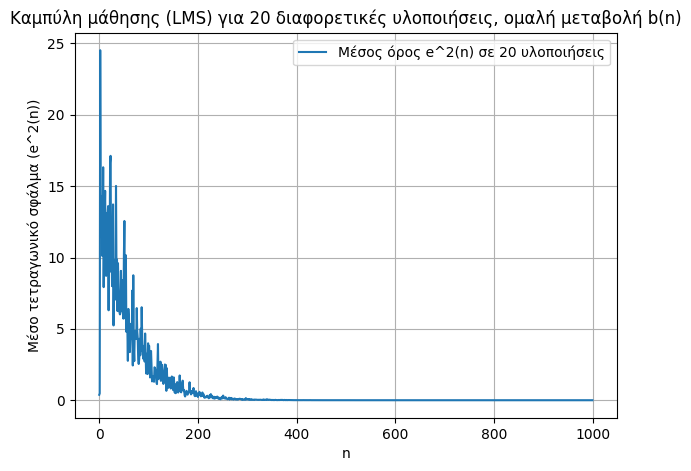

Μέσο Steady-State MSE (τελευταία 100 δείγματα) σε 20 υλοποιήσεις: 0.000000


In [13]:
import numpy as np
import matplotlib.pyplot as plt

# === 1. Βασικές Παράμετροι ===
N = 1000  # Πλήθος δειγμάτων
L = 3  # Τάξη φίλτρου (4 συντελεστές: w0, w1, w2, w3)
mu = 0.01  # Σταθερό βήμα εκμάθησης LMS
num_realizations = 20  # Πλήθος υλοποιήσεων


# === 2. Ορισμός της χρονικά μεταβαλλόμενης κρουστικής απόκρισης ===
# Για παράδειγμα, επιλέγουμε την ομαλή μεταβολή b(n):
def b_smooth(n):
    return 1.0 / (1.0 + np.exp(-0.02 * n))

def b_abrupt(n):
    # Ακαριαία μεταβολή:
    #  b(n) = 100 για 1 <= n <= 500
    #         0   για 501 <= n <= 1000
    if 1 <= n <= 500:
        return 100.0
    else:
        return 0.0


def lms_time_varying_mse(N, L, mu, seed):
    """
    Εκτελεί τον αλγόριθμο LMS για μία υλοποίηση λευκού θορύβου (seed),
    σε ένα χρονικά μεταβαλλόμενο σύστημα με b(n) = b_smooth(n).
    Επιστρέφει το διάνυσμα e^2(n), n=0..N-1.
    """
    # 1. Δημιουργούμε την είσοδο x(n) με το συγκεκριμένο seed
    np.random.seed(seed)
    x = np.random.normal(0, 1, N)

    # 2. Αρχικοποιούμε το FIR φίλτρο και τις δομές δεδομένων
    w_current = np.zeros(L + 1)  # w0, w1, w2, w3
    e_vec = np.zeros(N)

    # 3. Εκτελούμε LMS σε κάθε χρονική στιγμή n
    for n in range(N):
        # Υπολογισμός του d(n) από το χρονικά μεταβαλλόμενο σύστημα
        b_n = b_smooth(n)  # ομαλή μεταβολή
        d_n = b_n * x[n]
        if n >= 1: d_n -= 0.4 * x[n - 1]
        if n >= 2: d_n -= 4.0 * x[n - 2]
        if n >= 3: d_n += 0.5 * x[n - 3]

        # Δημιουργία διανύσματος εισόδου x_vec
        x_vec = np.zeros(L + 1)
        x_vec[0] = x[n]
        if n >= 1: x_vec[1] = x[n - 1]
        if n >= 2: x_vec[2] = x[n - 2]
        if n >= 3: x_vec[3] = x[n - 3]

        # Έξοδος φίλτρου και σφάλμα
        y_n = np.dot(w_current, x_vec)
        e_n = d_n - y_n
        e_vec[n] = e_n

        # Ενημέρωση βαρών
        w_current = w_current + mu * e_n * x_vec

    # Επιστροφή του e^2(n)
    return e_vec ** 2


# === 3. Εκτέλεση πολλαπλών υλοποιήσεων και υπολογισμός μέσου όρου e^2(n) ===

# Πίνακας για την αποθήκευση του e^2(n) σε κάθε υλοποίηση:
all_mse = np.zeros((N, num_realizations))

for r in range(num_realizations):
    # Για κάθε υλοποίηση (r), αλλάζουμε το seed ώστε να πάρουμε διαφορετικό θόρυβο x(n)
    seed = 100 + r  # πχ, seed=100,101,... για 20 υλοποιήσεις
    e2_n = lms_time_varying_mse(N, L, mu, seed)
    all_mse[:, r] = e2_n

# Υπολογισμός του μέσου όρου (over realizations) για κάθε n:
mean_mse = np.mean(all_mse, axis=1)

# === 4. Σχεδίαση της μέσης καμπύλης e^2(n) ===
plt.figure(figsize=(7, 5))
plt.plot(mean_mse, label='Μέσος όρος e^2(n) σε 20 υλοποιήσεις')
plt.title('Καμπύλη μάθησης (LMS) για 20 διαφορετικές υλοποιήσεις, ομαλή μεταβολή b(n)')
plt.xlabel('n')
plt.ylabel('Μέσο τετραγωνικό σφάλμα (e^2(n))')
plt.grid(True)
plt.legend()
plt.show()

# (Προαιρετικά) μπορούμε να τυπώσουμε και τη μέση τιμή των τελευταίων δειγμάτων
avg_steady_state = np.mean(mean_mse[-100:])
print(f"Μέσο Steady-State MSE (τελευταία 100 δείγματα) σε 20 υλοποιήσεις: {avg_steady_state:.6f}")


## B_abrupt

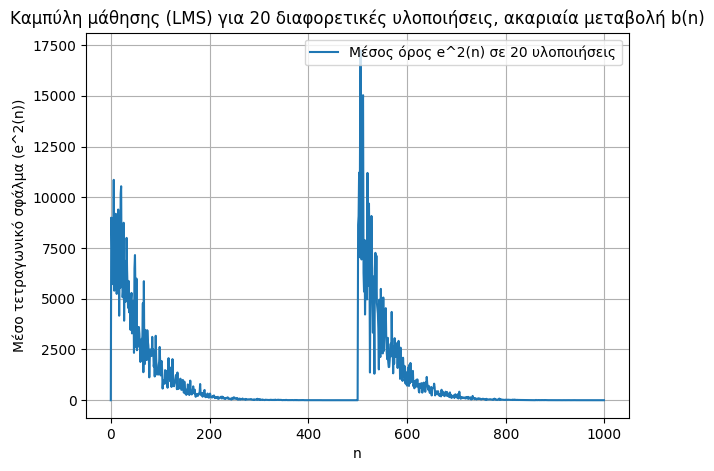

Μέσο Steady-State MSE (τελευταία 100 δείγματα) σε 20 υλοποιήσεις: 1.372661


In [14]:
import numpy as np
import matplotlib.pyplot as plt

# === 1. Βασικές Παράμετροι ===
N = 1000  # Πλήθος δειγμάτων
L = 3  # Τάξη φίλτρου (4 συντελεστές: w0, w1, w2, w3)
mu = 0.01  # Σταθερό βήμα εκμάθησης LMS
num_realizations = 20  # Πλήθος υλοποιήσεων


# === 2. Ορισμός της χρονικά μεταβαλλόμενης κρουστικής απόκρισης ===
# Για παράδειγμα, επιλέγουμε την ομαλή μεταβολή b(n):
def b_smooth(n):
    return 1.0 / (1.0 + np.exp(-0.02 * n))

def b_abrupt(n):
    # Ακαριαία μεταβολή:
    #  b(n) = 100 για 1 <= n <= 500
    #         0   για 501 <= n <= 1000
    if 1 <= n <= 500:
        return 100.0
    else:
        return 0.0


def lms_time_varying_mse(N, L, mu, seed):
    """
    Εκτελεί τον αλγόριθμο LMS για μία υλοποίηση λευκού θορύβου (seed),
    σε ένα χρονικά μεταβαλλόμενο σύστημα με b(n) = b_smooth(n).
    Επιστρέφει το διάνυσμα e^2(n), n=0..N-1.
    """
    # 1. Δημιουργούμε την είσοδο x(n) με το συγκεκριμένο seed
    np.random.seed(seed)
    x = np.random.normal(0, 1, N)

    # 2. Αρχικοποιούμε το FIR φίλτρο και τις δομές δεδομένων
    w_current = np.zeros(L + 1)  # w0, w1, w2, w3
    e_vec = np.zeros(N)

    # 3. Εκτελούμε LMS σε κάθε χρονική στιγμή n
    for n in range(N):
        # Υπολογισμός του d(n) από το χρονικά μεταβαλλόμενο σύστημα
        b_n = b_abrupt(n)  # ομαλή μεταβολή
        d_n = b_n * x[n]
        if n >= 1: d_n -= 0.4 * x[n - 1]
        if n >= 2: d_n -= 4.0 * x[n - 2]
        if n >= 3: d_n += 0.5 * x[n - 3]

        # Δημιουργία διανύσματος εισόδου x_vec
        x_vec = np.zeros(L + 1)
        x_vec[0] = x[n]
        if n >= 1: x_vec[1] = x[n - 1]
        if n >= 2: x_vec[2] = x[n - 2]
        if n >= 3: x_vec[3] = x[n - 3]

        # Έξοδος φίλτρου και σφάλμα
        y_n = np.dot(w_current, x_vec)
        e_n = d_n - y_n
        e_vec[n] = e_n

        # Ενημέρωση βαρών
        w_current = w_current + mu * e_n * x_vec

    # Επιστροφή του e^2(n)
    return e_vec ** 2


# === 3. Εκτέλεση πολλαπλών υλοποιήσεων και υπολογισμός μέσου όρου e^2(n) ===

# Πίνακας για την αποθήκευση του e^2(n) σε κάθε υλοποίηση:
all_mse = np.zeros((N, num_realizations))

for r in range(num_realizations):
    # Για κάθε υλοποίηση (r), αλλάζουμε το seed ώστε να πάρουμε διαφορετικό θόρυβο x(n)
    seed = 100 + r  # πχ, seed=100,101,... για 20 υλοποιήσεις
    e2_n = lms_time_varying_mse(N, L, mu, seed)
    all_mse[:, r] = e2_n

# Υπολογισμός του μέσου όρου (over realizations) για κάθε n:
mean_mse = np.mean(all_mse, axis=1)

# === 4. Σχεδίαση της μέσης καμπύλης e^2(n) ===
plt.figure(figsize=(7, 5))
plt.plot(mean_mse, label='Μέσος όρος e^2(n) σε 20 υλοποιήσεις')
plt.title('Καμπύλη μάθησης (LMS) για 20 διαφορετικές υλοποιήσεις, ακαριαία μεταβολή b(n)')
plt.xlabel('n')
plt.ylabel('Μέσο τετραγωνικό σφάλμα (e^2(n))')
plt.grid(True)
plt.legend()
plt.show()

# (Προαιρετικά) μπορούμε να τυπώσουμε και τη μέση τιμή των τελευταίων δειγμάτων
avg_steady_state = np.mean(mean_mse[-100:])
print(f"Μέσο Steady-State MSE (τελευταία 100 δείγματα) σε 20 υλοποιήσεις: {avg_steady_state:.6f}")
